# ***Project of KNN***

## **All imports using in this project.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

## **Sorensen distance**

In [ ]:
# here we write sorensen distance(SD) function
vSD1 = np.ones(5) # for testing to valid the code
vSD2 = np.ones(5) # for testing to valid the code
def SD(vSD1, vSD2):  #the Sorensen distance
  sum = 0
  for i in range(len(vSD1)):
    sum = abs(vSD1[i] - vSD2[i]) / (vSD1[i] + vSD2[i]+0.0000001)
  return sum
SD(vSD1, vSD2)

0.0

## **Additive distance**

In [ ]:
# here we write Additive distance(ASCSD) function
vASCSD1 = np.zeros(5) # for testing to valid the code
vASCSD2 = np.zeros(5) # for testing to valid the code
def ASCSD(vASCSD1, vASCSD2):  # the Additive distance
  sum = 0
  for i in range(len(vASCSD1)):
    sum = pow((vASCSD1[i] - vASCSD2[i]),2) * (vASCSD1[i] + vASCSD2[i]) / (vASCSD1[i] * vASCSD2[i]+0.000001)
  return sum*2
ASCSD(vASCSD1, vASCSD2) 

0.0

## **Divergence distance**

In [ ]:
# here i write Divergence distance(DivD) function
vDIVD1 = np.zeros(5) # for testing to valid the code
vDIVD2 = np.zeros(5) # for testing to valid the code
def DIVD(vDIVD1, vDIVD2):  # the Divergence distance
  sum = 0
  for i in range(len(vDIVD1)):
    sum = pow((vDIVD1[i] - vDIVD2[i]), 2) / pow((vDIVD1[i] + vDIVD2[i] + 0.0000001), 2)
  return sum*2
DIVD(vDIVD1, vDIVD2)

0.0

## **Jaccard distance**

In [ ]:
# here i write Jaccard distance(JacD) function
vJACD1 = np.zeros(5) # for testing to valid the code
vJACD2 = np.zeros(5) # for testing to valid the code
def JACD(vJACD1, vJACD2):  # the Jaccard distance
  sum = 0
  for i in range(len(vJACD1)):
    sum = pow((vJACD1[i] - vJACD2[i]), 2) / pow(vJACD1[i] + 0.000001, 2) + pow(vJACD2[i], 2) - (vJACD1[i] * vJACD2[i])
  return sum
JACD(vJACD1, vJACD2)

0.0

In [ ]:
Alldistances=[SD, ASCSD, DIVD, JACD]
Alldatasets=["/content/Covid Data (UP).csv", "/content/diabetes.csv", "/content/exams(UP).csv"]
accumat=[]

for i,distances in zip(Alldistances,['SD', 'ASCSD', 'DIVD', 'JACD']):
  for j in Alldatasets:

    data = pd.read_csv(j).values

    X=data[:,:-1]
    y=data[:,-1]
    X = X - np.mean(X)/np.std(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    

    model = KNeighborsClassifier(metric = i)

    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    
    l = ("".join(j.split("/")[-1][:-4]),distances,accuracy_score(y_test,preds),
         confusion_matrix(y_test,preds), precision_score(y_test,preds),
         recall_score(y_test,preds))
    accumat.append(l)
accumat

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[('Covid Data (UP)', 'SD', 0.5844444444444444, array([[  9, 173],
         [ 14, 254]]), 0.391304347826087, 0.04945054945054945),
 ('diabetes', 'SD', 0.670995670995671, array([[143,  11],
         [ 65,  12]]), 0.5217391304347826, 0.15584415584415584),
 ('exams(UP)', 'SD', 0.49, array([[118,  16],
         [137,  29]]), 0.6444444444444445, 0.1746987951807229),
 ('Covid Data (UP)', 'ASCSD', 0.6222222222222222, array([[ 53, 123],
         [ 47, 227]]), 0.53, 0.30113636363636365),
 ('diabetes', 'ASCSD', 0.6277056277056277, array([[121,  22],
         [ 64,  24]]), 0.5217391304347826, 0.2727272727272727),
 ('exams(UP)', 'ASCSD', 0.49333333333333335, array([[127,  16],
         [136,  21]]), 0.5675675675675675, 0.1337579617834395),
 ('Covid Data (UP)', 'DIVD', 0.6111111111111112, array([[ 59, 111],
         [ 64, 216]]), 0.4796747967479675, 0.34705882352941175),
 ('diabetes', 'DIVD', 0.6190476190476191, array([[128,  24],
         [ 64,  15]]), 0.38461538461538464, 0.189873417721519),
 ('ex

# **KNN classification** 

In [ ]:
DataF = pd.DataFrame(data = accumat,columns=["dataset",
                                             "distancemetric",
                                             "accuracy score",
                                             "confusion matrix",
                                             "precision",
                                             "recall"])
DataF

,dataset,distancemetric,accuracy score,confusion matrix,precision,recall
0,Covid Data (UP),SD,0.584444,"[[9, 173], [14, 254]]",0.391304,0.049451
1,diabetes,SD,0.670996,"[[143, 11], [65, 12]]",0.521739,0.155844
2,exams(UP),SD,0.490000,"[[118, 16], [137, 29]]",0.644444,0.174699
3,Covid Data (UP),ASCSD,0.622222,"[[53, 123], [47, 227]]",0.530000,0.301136
4,diabetes,ASCSD,0.627706,"[[121, 22], [64, 24]]",0.521739,0.272727
5,exams(UP),ASCSD,0.493333,"[[127, 16], [136, 21]]",0.567568,0.133758
6,Covid Data (UP),DIVD,0.611111,"[[59, 111], [64, 216]]",0.479675,0.347059
7,diabetes,DIVD,0.619048,"[[128, 24], [64, 15]]",0.384615,0.189873
8,exams(UP),DIVD,0.500000,"[[121, 19], [131, 29]]",0.604167,0.181250
9,Covid Data (UP),JACD,0.395556,"[[135, 63], [209, 43]]",0.392442,0.681818


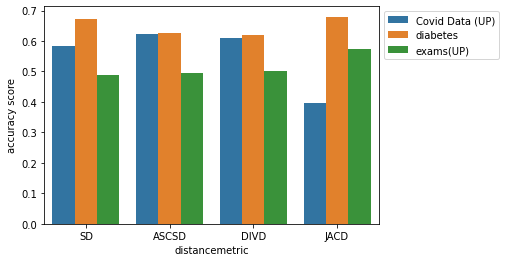

In [ ]:
sns.barplot(data=DataF,x = "distancemetric",y = 'accuracy score',hue='dataset' )
plt.legend(bbox_to_anchor=(1,1))

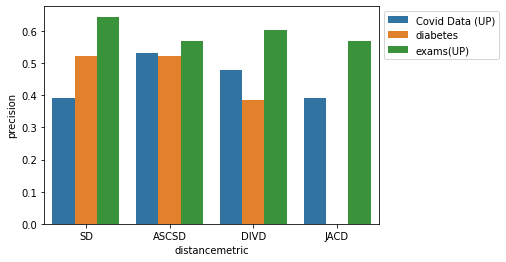

In [ ]:
sns.barplot(data=DataF,x = "distancemetric",y = 'precision',hue='dataset' )
plt.legend(bbox_to_anchor=(1,1))

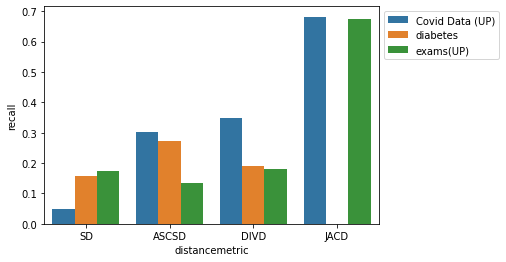

In [ ]:
sns.barplot(data=DataF,x = "distancemetric",y = 'recall',hue='dataset' )
plt.legend(bbox_to_anchor=(1,1))